In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("NewCar.csv")
df.head()

,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,engine-location,wheel-base,length,width,height,curbweight,num-of-cylinders,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,citympg,highway-mpg,price
0,121.803681,gas,std,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,9.0,111,5000,21,27.0,13495.0
1,121.803681,gas,std,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,9.0,111,5000,21,27.0,16500.0
2,121.803681,gas,std,two,hatchback,front,94.5,171.2,65.5,52.4,2823,six,152,mpfi,9.0,154,5000,19,26.0,16500.0
3,164.000000,gas,std,four,sedan,front,99.8,176.6,66.2,54.3,2337,four,109,mpfi,10.0,102,5500,24,30.0,13950.0
4,164.000000,gas,std,four,sedan,front,99.4,176.6,66.4,54.3,2824,five,136,mpfi,8.0,115,5500,18,22.0,17450.0


In [3]:
x=df[['normalized-losses', 'wheel-base', 'length', 'width','height', 'curbweight', 'engine-size',
   'compression-ratio', 'horsepower', 'peak-rpm', 'citympg','highway-mpg']]
y=df['price']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeRegressor
l=DecisionTreeRegressor()
l.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [6]:
l.classes_

In [7]:
l.class_weight

In [8]:
prediction=l.predict(X_test)

In [9]:
prediction

array([27500.        , 18150.        , 18950.        ,  9279.        ,
       22625.        ,  8778.        , 12945.        , 17199.        ,
       19045.        ,  7995.        , 27500.        ,  8058.        ,
        9279.        ,  9980.        , 12663.45595855, 12290.        ,
        5572.        ,  6989.        , 12663.45595855, 11245.        ,
       17199.        , 10345.        ,  7349.        , 12663.45595855,
       27500.        , 27500.        , 10898.        ,  9279.        ,
        9980.        , 27500.        , 22625.        , 22625.        ,
       27500.        , 22625.        ,  6189.        , 13499.        ,
        7775.        ,  7603.        ,  9279.        ,  6989.        ,
       14869.        , 19045.        ,  7299.        , 10295.        ,
        7150.5       ,  6692.        , 12440.        ,  5389.        ,
       12663.45595855,  8845.        ,  7198.        ,  9279.        ,
        6649.        , 12945.        , 12663.45595855,  7150.5       ,
      

In [10]:
y_test.head()

15     27500.000000
9      12663.455959
115    18150.000000
78      9959.000000
66     27500.000000
Name: price, dtype: float64

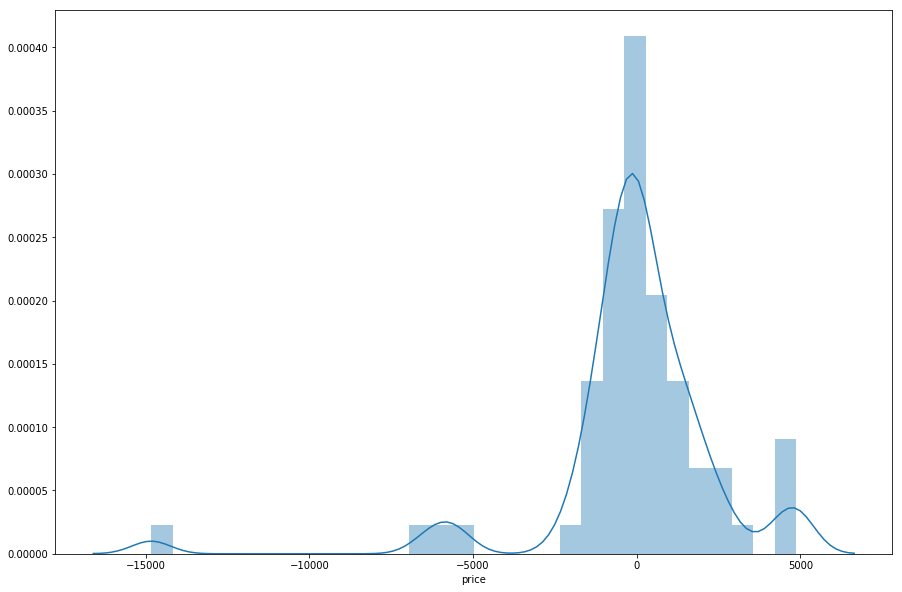

In [11]:
plt.figure(figsize = (15,10))
sns.distplot(y_test-prediction,bins=30)

In [12]:
from sklearn import metrics

In [13]:
metrics.mean_absolute_error(y_test,prediction)

1508.0

In [14]:
metrics.mean_squared_error(y_test,prediction)

7254649.940762314

In [15]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

2693.445737482438

In [16]:
accuracy = l.score(X_test,y_test)

In [17]:
print(accuracy*100,'%')

83.80894170877956 %


In [18]:
metrics.r2_score(y_train,l.predict(X_train))

0.9985249950285828

In [19]:
metrics.r2_score(y_test,prediction)

0.8380894170877956

# Using Categorial variables too

In [20]:
df=pd.read_csv("CategoriacalCar.csv")
df.head()

,normalized-losses,wheel-base,length,width,height,curbweight,engine-size,compression-ratio,horsepower,peak-rpm,...,twelve,two.1,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,price
0,121.803681,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,13495.0
1,121.803681,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,16500.0
2,121.803681,94.5,171.2,65.5,52.4,2823,152,9.0,154,5000,...,0,0,0,0,0,0,0,1,0,16500.0
3,164.000000,99.8,176.6,66.2,54.3,2337,109,10.0,102,5500,...,0,0,0,0,0,0,0,1,0,13950.0
4,164.000000,99.4,176.6,66.4,54.3,2824,136,8.0,115,5500,...,0,0,0,0,0,0,0,1,0,17450.0


In [21]:
a=['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curbweight', 'compression-ratio', 'horsepower',
      'citympg',  'gas', 'turbo', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'rear',  'four', 'six', 'three',
        '1bbl', '2bbl', 'idi', 'mfi', 'mpfi',
       'spdi']

In [22]:
y1=df['price']
x=df.iloc[:,:-1]
#x=df[a]
x.head()

,normalized-losses,wheel-base,length,width,height,curbweight,engine-size,compression-ratio,horsepower,peak-rpm,...,three,twelve,two.1,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi
0,121.803681,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,...,0,0,0,0,0,0,0,0,1,0
1,121.803681,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,...,0,0,0,0,0,0,0,0,1,0
2,121.803681,94.5,171.2,65.5,52.4,2823,152,9.0,154,5000,...,0,0,0,0,0,0,0,0,1,0
3,164.000000,99.8,176.6,66.2,54.3,2337,109,10.0,102,5500,...,0,0,0,0,0,0,0,0,1,0
4,164.000000,99.4,176.6,66.4,54.3,2824,136,8.0,115,5500,...,0,0,0,0,0,0,0,0,1,0


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y1, test_size=0.33, random_state=42)

In [24]:
from sklearn.tree import DecisionTreeRegressor
l=DecisionTreeRegressor()
l.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [25]:
l.classes_

In [26]:
l.class_weight

In [27]:
prediction=l.predict(X_test)

In [28]:
prediction

array([27500.        , 18150.        , 18280.        ,  9279.        ,
       23875.        , 11549.        , 11694.        , 17199.        ,
       19045.        ,  7299.        , 27500.        ,  8058.        ,
       11850.        ,  9980.        , 12663.45595855, 11245.        ,
        5572.        ,  6785.        , 12663.45595855, 10898.        ,
       17199.        ,  8845.        ,  7349.        , 12663.45595855,
       27500.        , 27500.        , 10898.        ,  9279.        ,
        9980.        , 27500.        , 23875.        , 23875.        ,
       27500.        , 22470.        ,  6189.        , 13499.        ,
        7295.        ,  7957.        , 11850.        ,  6989.        ,
       14869.        , 19045.        ,  7299.        , 10295.        ,
        7150.5       ,  7299.        , 12440.        ,  5348.        ,
       12663.45595855,  8845.        ,  7295.        , 11850.        ,
        7499.        , 11850.        , 12663.45595855,  7150.5       ,
      

In [29]:
y_test.head()

15     27500.000000
9      12663.455959
115    18150.000000
78      9959.000000
66     27500.000000
Name: price, dtype: float64

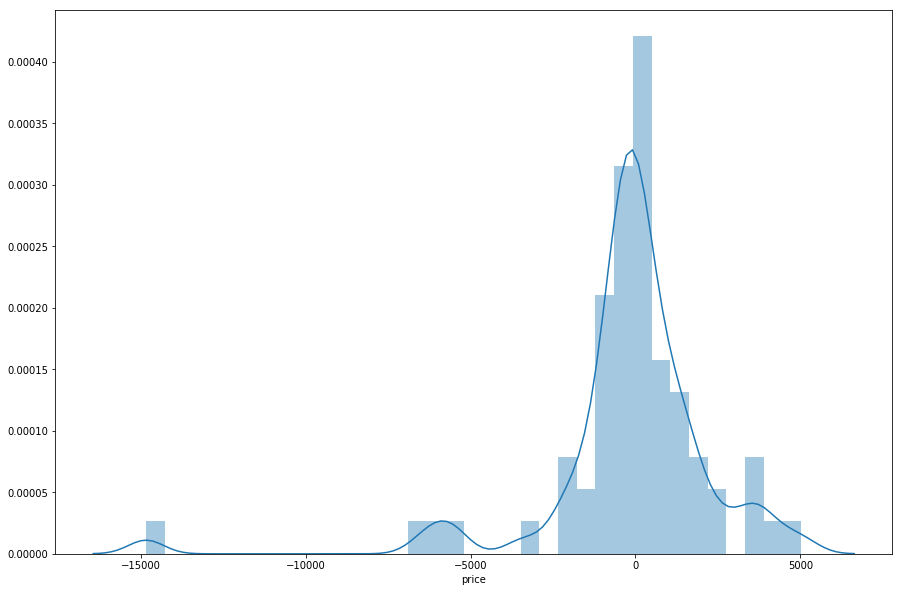

In [30]:
plt.figure(figsize = (15,10))
sns.distplot(y_test-prediction,bins=35)

In [31]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,prediction)

1486.8208955223881

In [32]:
metrics.mean_squared_error(y_test,prediction)

7137267.060165299

In [33]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

2671.566405718806

In [34]:
accuracy = l.score(X_test,y_test)

In [35]:
print(accuracy*100,'%')

84.07091893409803 %


In [36]:
metrics.r2_score(y_train,l.predict(X_train))

0.998550302404598

In [37]:
metrics.r2_score(y_test,prediction)

0.8407091893409802